


### **Load required libraries and datasets**

In [4]:
# # Install the pandas library if not already installed
# !pip install pandas

# # Import the pandas library
import pandas as pd

# # Mount Google Drive (if your Excel file is stored in Google Drive)
# # This step is necessary to access files in Google Drive from Google Colab
# from google.colab import drive
# drive.mount('/content/drive')



In [5]:
# # Specify the path to your Excel file in Google Drive
# excel_file_path = '/content/drive/MyDrive/modified_database.xlsx'
# # Read the Excel file into a DataFrame
# df = pd.read_excel(excel_file_path)
# # Now, 'df' contains your data from the Excel file

In [6]:
# Read the Excel file into a DataFrame
df = pd.read_excel('modified_database.xlsx')

### **Exploratory data analysis**
The first step in any analysis is to first understand the data. Let’s take a look at each of the datasets provided.

In [7]:
print(df.head())  # View the first 5 rows
print(df.tail())  # View the last 5 rows

        Year Jurisdiction   Category       Type Classification Total type  \
0  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
1  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
2  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
3  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
4  2020-2021          ACT  Biosolids        NaN       Category        NaN   

  Stream      Management       Fate        Tonnes Core or non-core  \
0    C&I  Other disposal   Disposal  20185.549742       Core waste   
1    C&I       Recycling  Recycling      0.000000       Core waste   
2  Total  Other disposal   Disposal  20185.549742       Core waste   
3  Total       Recycling  Recycling      0.000000       Core waste   
4    C&I  Other disposal   Disposal  20185.549742       Core waste   

    Sub-stream   Cat. order Cat. no.    Type order Type no.       YearOnly  
0  03 C&I core  03 Organics       C3  1

In [8]:
print(df.info())  # Get basic information about the DataFrame
print(df.shape)   # Get the number of rows and columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71036 entries, 0 to 71035
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              71036 non-null  object 
 1   Jurisdiction      71036 non-null  object 
 2   Category          71036 non-null  object 
 3   Type              53984 non-null  object 
 4   Classification    71036 non-null  object 
 5   Total type        4729 non-null   object 
 6   Stream            71036 non-null  object 
 7   Management        71036 non-null  object 
 8   Fate              71036 non-null  object 
 9   Tonnes            71036 non-null  float64
 10  Core or non-core  71036 non-null  object 
 11  Sub-stream        71036 non-null  object 
 12  Cat. order        71036 non-null  object 
 13  Cat. no.          71036 non-null  object 
 14  Type order        53990 non-null  object 
 15  Type no.          53990 non-null  object 
 16                    8558 non-null   object

In [9]:
print(df.describe())  # Summary statistics for numeric columns (i.e., Tonnes)

             Tonnes      YearOnly
count  7.103600e+04  71036.000000
mean   9.380932e+04   2013.411003
std    2.561327e+06      4.408452
min   -2.023016e-08   2006.000000
25%    0.000000e+00   2009.000000
50%    1.399888e-01   2014.000000
75%    4.500000e+03   2017.000000
max    3.626555e+08   2020.000000


In [10]:
# Count the number of 0s in the 'Tonnes'
count = 0
for each in df['Tonnes']:
  if each == 0:
    count += 1
print("Number of 0s in 'Tonnes':", count)


Number of 0s in 'Tonnes': 34239


We can do some analysis based on the above information. The dataset is shaped as 71496 rows and 17 columns. Our target column here is the numeric column 'Tonnes', which has a range from 6.19 to -2.02 and 34340 of values equal to zero. Tonnes = The quantity of waste.

Why is there a -2.02 here? Are there other negatives, what does negative waste management mean?

The max of 6.196605e+08 seems out of place as well, since at 75% it is only 4.598171e+03.

Does zero have a menaing in waste management? (i.e., is 0 valuable information)

In [11]:
# isolate the min -2.02 and look at what is going on
# Define the condition
condition = df['Tonnes'] == min(df['Tonnes'])

# Use boolean indexing to retrieve the rows that meet the condition
filtered_rows = df[condition]

# Display the filtered rows
print(filtered_rows)

           Year Jurisdiction          Category   Type Classification  \
2424  2020-2021          Qld  Hazardous wastes  Other           Type   
2431  2020-2021          Qld  Hazardous wastes  Other           Type   

     Total type Stream Management      Fate        Tonnes Core or non-core  \
2424        NaN    C&I   Landfill  Disposal -2.023016e-08       Core waste   
2431        NaN  Total   Landfill  Disposal -2.023016e-08       Core waste   

       Sub-stream           Cat. order Cat. no. Type order Type no.       \
2424  03 C&I core  09 Hazardous wastes       C9   50 Other      T50  NaN   
2431     09 Total  09 Hazardous wastes       C9   50 Other      T50  NaN   

      YearOnly  
2424      2020  
2431      2020  


In [12]:
# Are there any other negative values like this?
# Define the condition
condition = df['Tonnes'] < 0

# Use boolean indexing to retrieve the rows that meet the condition
filtered_rows = df[condition]

# Display the filtered rows
print(filtered_rows)

            Year Jurisdiction          Category   Type Classification  \
2424   2020-2021          Qld  Hazardous wastes  Other           Type   
2426   2020-2021          Qld  Hazardous wastes  Other           Type   
2431   2020-2021          Qld  Hazardous wastes  Other           Type   
2433   2020-2021          Qld  Hazardous wastes  Other           Type   
5352   2020-2021           WA  Hazardous wastes  Other           Type   
5359   2020-2021           WA  Hazardous wastes  Other           Type   
31424  2015-2016           WA  Hazardous wastes  Other           Type   
31430  2015-2016           WA  Hazardous wastes  Other           Type   
36451  2014-2015           WA  Hazardous wastes  Other           Type   
36457  2014-2015           WA  Hazardous wastes  Other           Type   

      Total type Stream      Management       Fate        Tonnes  \
2424         NaN    C&I        Landfill   Disposal -2.023016e-08   
2426         NaN    C&I       Recycling  Recycling -2.024991

A negative value like -2.023016e-08 tonnes suggests that there has been a reduction in the amount of hazardous waste. This could mean that the waste management practices in place have successfully reduced or eliminated a certain quantity of hazardous materials.

The value -2.023016e-08 tonnes is a very small quantity (i.e., -0.02023016g), indicating a highly precise measurement, possibly at a very fine level of detail. This level of precision is common in environmental monitoring and waste management, where even small changes in hazardous waste quantities can be significant.

In [13]:
# Count missing values in each column
missing_values = df.isna().sum()
print(missing_values)

Year                    0
Jurisdiction            0
Category                0
Type                17052
Classification          0
Total type          66307
Stream                  0
Management              0
Fate                    0
Tonnes                  0
Core or non-core        0
Sub-stream              0
Cat. order              0
Cat. no.                0
Type order          17046
Type no.            17046
                    62478
YearOnly                0
dtype: int64


**Type**: A more detailed classification of waste material. For example, the
category 'Metals' may be split into : 'Aluminium', 'Non-ferrous metals (ex.
aluminium)', and 'Iron and steel'.

**Total type**: Describes which category each data point classified as 'Total' refers to.

There are no desription for **Type order** and **Type no**.

The above columns contain significant amount of missing values. From the description, it does not seem that these columns carry important information, thus we believe we can remove these columns as we preprocess our data. We will comeback to it, if we find that the columns are useful.  


### Create Methods to help analyze


In [14]:
# define method to look at unique values in non numerica columns
def print_unique_values(df):
  # Iterate through each column and print unique values for non-numeric columns
  for column in df.columns:
      if not pd.api.types.is_numeric_dtype(df[column]):
          unique_values = df[column].unique()
          print(f"Column: {column}")
          print(f"Unique Values: {unique_values}")
          print()

In [15]:
# Count missing values in each column
def print_missing_values(df):
  missing_values = df.isna().sum()
  print(missing_values)

### Investigate the total trend

Create graph on the total trend

In [32]:
# Define the condition
condition1 = df['Total type'].notnull()

# remove Australia
# Define the condition
condition2 = df['Jurisdiction'] != 'Australia'

# Use boolean indexing to retrieve the rows that meet the condition
df_total = df[condition1 & condition2].copy()

Important_columns = ['Year', 'Jurisdiction', 'Total type','Stream', 'Tonnes','YearOnly']

df_total = df_total[Important_columns]

# remove unrelated Columns
print_unique_values(df_total)
#print_missing_values(df_total)

Column: Year
Unique Values: ['2020-2021' '2019-2020' '2018-2019' '2017-2018' '2016-2017' '2015-2016'
 '2014-2015' '2013-2014' '2012-2013' '2011-2012' '2010-2011' '2009-2010'
 '2008-2009' '2007-2008' '2006-2007']

Column: Jurisdiction
Unique Values: ['ACT' 'NSW' 'NT' 'Qld' 'SA' 'Tas' 'Vic' 'WA']

Column: Total type
Unique Values: ['Biosolids total' 'Hazwaste total' 'All other waste total'
 'Ash waste total']

Column: Stream
Unique Values: ['C&I' 'Total' 'C&D' 'MSW']



Create line graph, group by Year and Total type.

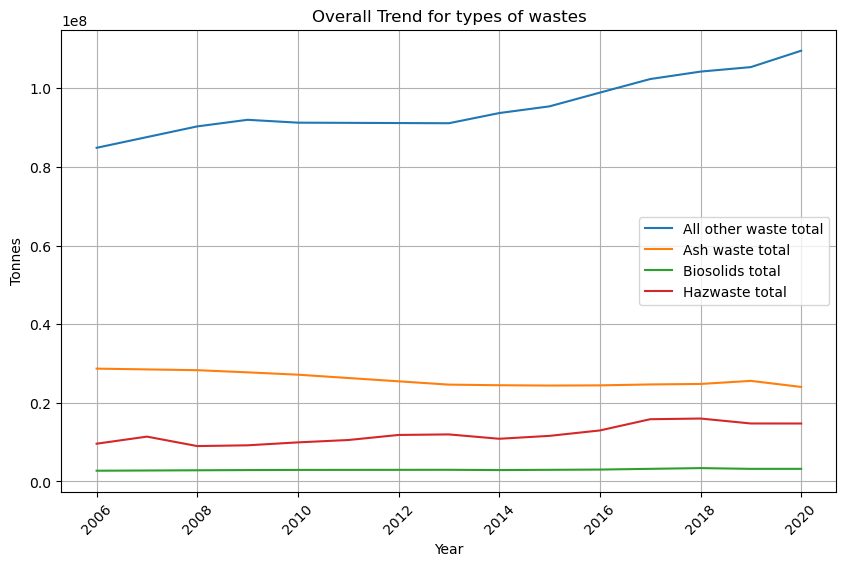

In [34]:
import matplotlib.pyplot as plt
# Group by 'Year' and 'Jurisdiction' and sum the 'Tonnes' column
grouped_df = df_total.groupby(['YearOnly','Total type'])['Tonnes'].sum().reset_index()

# Create a line chart with a separate line for each jurisdiction
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each unique jurisdiction
for types in grouped_df['Total type'].unique():
    subset = grouped_df[grouped_df['Total type'] == types]
    ax.plot(subset['YearOnly'], subset['Tonnes'], label=types)

# Set labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Tonnes')
ax.set_title('Overall Trend for types of wastes')
ax.legend()

# Rotate x-axis labels (titles) by 45 degrees for better readability
plt.xticks(rotation=45)

# Show the chart
plt.grid(True)
plt.show()

Mining waste data only has data from 2018, we will exclude it for visualization purposes

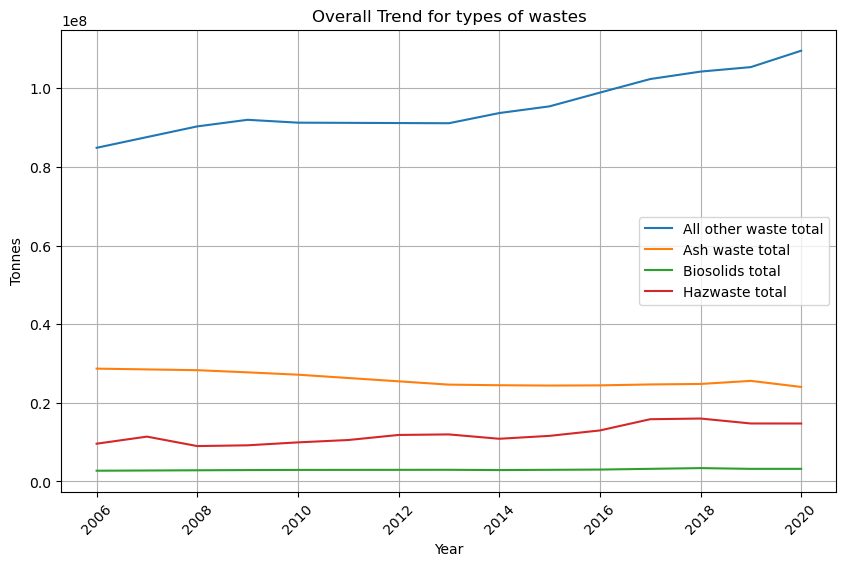

In [35]:
# Define the condition
condition = df_total['Total type'] != 'Mining waste total'

# Use boolean indexing to retrieve the rows that meet the condition
df_total = df_total[condition].copy()

# Group by 'Year' and 'Jurisdiction' and sum the 'Tonnes' column
grouped_df = df_total.groupby(['YearOnly','Total type'])['Tonnes'].sum().reset_index()

# Create a line chart with a separate line for each jurisdiction
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each unique jurisdiction
for types in grouped_df['Total type'].unique():
    subset = grouped_df[grouped_df['Total type'] == types]
    ax.plot(subset['YearOnly'], subset['Tonnes'], label=types)

# Set labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Tonnes')
ax.set_title('Overall Trend for types of wastes')
ax.legend()

# Rotate x-axis labels (titles) by 45 degrees for better readability
plt.xticks(rotation=45)

# Show the chart
plt.grid(True)
plt.show()

We do not understand what All other waste total refers to, thus we remove it.

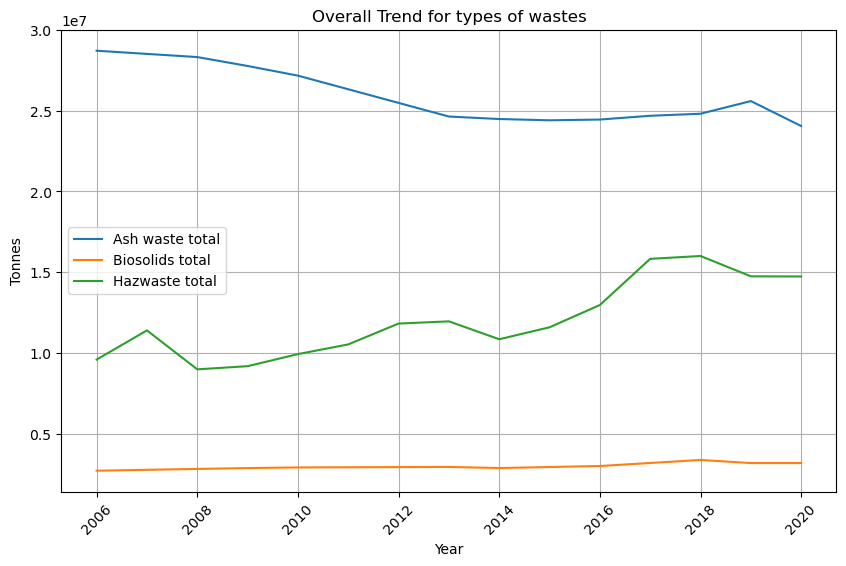

In [36]:
# Define the condition
condition = df_total['Total type'] != 'All other waste total'

# Use boolean indexing to retrieve the rows that meet the condition
df_total = df_total[condition].copy()

# Group by 'Year' and 'Jurisdiction' and sum the 'Tonnes' column
grouped_df = df_total.groupby(['YearOnly','Total type'])['Tonnes'].sum().reset_index()

# Create a line chart with a separate line for each jurisdiction
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each unique jurisdiction
for types in grouped_df['Total type'].unique():
    subset = grouped_df[grouped_df['Total type'] == types]
    ax.plot(subset['YearOnly'], subset['Tonnes'], label=types)

# Set labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Tonnes')
ax.set_title('Overall Trend for types of wastes')
ax.legend()

# Rotate x-axis labels (titles) by 45 degrees for better readability
plt.xticks(rotation=45)

# Show the chart
plt.grid(True)
plt.show()

In [37]:
# Remove columns with missing values
df_cleaned = df.dropna(axis=1)

print(df_cleaned.shape)
# Count missing values in each column
missing_values = df_cleaned.isna().sum()
print(missing_values)

(71036, 13)
Year                0
Jurisdiction        0
Category            0
Classification      0
Stream              0
Management          0
Fate                0
Tonnes              0
Core or non-core    0
Sub-stream          0
Cat. order          0
Cat. no.            0
YearOnly            0
dtype: int64


After investigating the table, 0 does not provide information for us, thus we will remove it.

In [39]:
# Define the condition
condition = df_cleaned['Tonnes'] != 0

# Use boolean indexing to retrieve the rows that meet the condition
df_cleaned = df_cleaned[condition]

# check for zeros
# Count the number of 0s in the 'Tonnes'
count = 0
for each in df_cleaned['Tonnes']:
  if each == 0:
    count += 1
print("Number of 0s in 'Tonnes':", count)

Number of 0s in 'Tonnes': 0


isolate Hazardous wastes and investigate its trend

In [40]:
#isolate Hazardous wastes
# Are there any other negative values like this?
# Define the condition
condition = df_cleaned['Category'] == 'Hazardous wastes'

# Use boolean indexing to retrieve the rows that meet the condition
df_1 = df_cleaned[condition].copy()

# Investigate
print(df_1.describe())

             Tonnes      YearOnly
count  2.148300e+04  21483.000000
mean   2.517754e+04   2012.938370
std    9.794044e+04      4.305486
min   -2.023016e-08   2006.000000
25%    1.326975e+01   2009.000000
50%    4.766449e+02   2013.000000
75%    7.974573e+03   2017.000000
max    2.200993e+06   2020.000000


In [41]:
# Are there any other negative values like this?
# Define the condition
condition = df_1['Tonnes'] < 0

# Use boolean indexing to retrieve the rows that meet the condition
filtered_rows = df_1[condition]

# Display 5 filtered rows
print(filtered_rows[0:5])

           Year Jurisdiction          Category Classification Stream  \
2424  2020-2021          Qld  Hazardous wastes           Type    C&I   
2426  2020-2021          Qld  Hazardous wastes           Type    C&I   
2431  2020-2021          Qld  Hazardous wastes           Type  Total   
2433  2020-2021          Qld  Hazardous wastes           Type  Total   
5352  2020-2021           WA  Hazardous wastes           Type    C&I   

          Management       Fate        Tonnes Core or non-core   Sub-stream  \
2424        Landfill   Disposal -2.023016e-08       Core waste  03 C&I core   
2426       Recycling  Recycling -2.024991e-10       Core waste  03 C&I core   
2431        Landfill   Disposal -2.023016e-08       Core waste     09 Total   
2433       Recycling  Recycling -2.024991e-10       Core waste     09 Total   
5352  Other disposal   Disposal -2.126931e-15       Core waste  03 C&I core   

               Cat. order Cat. no.  YearOnly  
2424  09 Hazardous wastes       C9      2020 

In [42]:

print_unique_values(df_1)

Column: Year
Unique Values: ['2020-2021' '2019-2020' '2018-2019' '2017-2018' '2016-2017' '2015-2016'
 '2014-2015' '2013-2014' '2012-2013' '2011-2012' '2010-2011' '2009-2010'
 '2008-2009' '2007-2008' '2006-2007']

Column: Jurisdiction
Unique Values: ['ACT' 'NSW' 'NT' 'Qld' 'SA' 'Tas' 'Vic' 'WA']

Column: Category
Unique Values: ['Hazardous wastes']

Column: Classification
Unique Values: ['Type' 'Category' 'Total']

Column: Stream
Unique Values: ['C&I' 'Total' 'C&D']

Column: Management
Unique Values: ['Landfill' 'Other disposal' 'Recycling' 'Treatment'
 'Energy from waste facility']

Column: Fate
Unique Values: ['Disposal' 'Recycling' 'Energy recovery']

Column: Core or non-core
Unique Values: ['Core waste']

Column: Sub-stream
Unique Values: ['03 C&I core' '09 Total' '02 C&D']

Column: Cat. order
Unique Values: ['09 Hazardous wastes']

Column: Cat. no.
Unique Values: ['C9']



For simplicity purposes, we can remove the columns with only one unique value

In [43]:
# Find columns with only one unique value
constant_columns = [column for column in df_1.columns if len(df_1[column].unique()) == 1]

# Drop the constant columns from the DataFrame
df_1 = df_1.drop(columns=constant_columns)

# Drop sub stream as well, since we already have Stream that represents the same thing
df_1 = df_1.drop('Sub-stream', axis=1)

# Now, 'df' will contain only columns with more than one unique value
#print_unique_values(df_1)

In [44]:
# isolate years and see how the data is structured
# Define the condition
condition1 = df_1['Year'] == '2020-2021'

# Define the second condition
condition2 = df_1['Jurisdiction'] == 'ACT'

# Define the third condition
condition3 = df_1['Classification'] == 'Total'

# Define the fourth condition
condition4 = df_1['Stream'] == 'Total'

# Combine the conditions using the '&' operator for 'and' logic
combined_condition = condition1 & condition2 & condition3 & condition4

# Use boolean indexing to retrieve the rows that meet the combined condition
filtered_rows = df_1[combined_condition]

# Display the filtered rows
print(filtered_rows)

          Year Jurisdiction Classification Stream                  Management  \
498  2020-2021          ACT          Total  Total  Energy from waste facility   
499  2020-2021          ACT          Total  Total                    Landfill   
500  2020-2021          ACT          Total  Total              Other disposal   
501  2020-2021          ACT          Total  Total                   Recycling   
502  2020-2021          ACT          Total  Total                   Treatment   
503  2020-2021          ACT          Total  Total                   Treatment   
504  2020-2021          ACT          Total  Total                   Treatment   

                Fate        Tonnes  YearOnly  
498  Energy recovery   2801.198415      2020  
499         Disposal  21316.746827      2020  
500         Disposal    204.149529      2020  
501        Recycling   6809.621137      2020  
502         Disposal    896.414646      2020  
503  Energy recovery    148.870191      2020  
504        Recycling  

We want to look at the overall trend in Hazardous wastes over time. So Management and treatment is irrelevant at this moment. Investigate the total Hazardous wastes trend for each state over the years

In [29]:
print_unique_values(df_1)

Column: Year
Unique Values: ['2020-2021' '2019-2020' '2018-2019' '2017-2018' '2016-2017' '2015-2016'
 '2014-2015' '2013-2014' '2012-2013' '2011-2012' '2010-2011' '2009-2010'
 '2008-2009' '2007-2008' '2006-2007']

Column: Jurisdiction
Unique Values: ['ACT' 'NSW' 'NT' 'Qld' 'SA' 'Tas' 'Vic' 'WA']

Column: Classification
Unique Values: ['Type' 'Category' 'Total']

Column: Stream
Unique Values: ['C&I' 'Total' 'C&D']

Column: Management
Unique Values: ['Landfill' 'Other disposal' 'Recycling' 'Treatment'
 'Energy from waste facility']

Column: Fate
Unique Values: ['Disposal' 'Recycling' 'Energy recovery']



In [45]:
# isolate years and see how the data is structured
# Define the third condition
print_unique_values(df_1)
condition3 = df_1['Classification'] == 'Total'

# Define the fourth condition
condition4 = df_1['Stream'] == 'Total'

# Combine the conditions using the '&' operator for 'and' logic
combined_condition = condition3 & condition4

# Use boolean indexing to retrieve the rows that meet the combined condition
df_1_1 = df_1[combined_condition].copy()

# Group by 'Year' and 'Jurisdiction' and sum the 'Tonnes' column
df_1_1 = df_1_1.groupby(['YearOnly', 'Jurisdiction'])['Tonnes'].sum().reset_index()

print(df_1_1[0:20])

Column: Year
Unique Values: ['2020-2021' '2019-2020' '2018-2019' '2017-2018' '2016-2017' '2015-2016'
 '2014-2015' '2013-2014' '2012-2013' '2011-2012' '2010-2011' '2009-2010'
 '2008-2009' '2007-2008' '2006-2007']

Column: Jurisdiction
Unique Values: ['ACT' 'NSW' 'NT' 'Qld' 'SA' 'Tas' 'Vic' 'WA']

Column: Classification
Unique Values: ['Type' 'Category' 'Total']

Column: Stream
Unique Values: ['C&I' 'Total' 'C&D']

Column: Management
Unique Values: ['Landfill' 'Other disposal' 'Recycling' 'Treatment'
 'Energy from waste facility']

Column: Fate
Unique Values: ['Disposal' 'Recycling' 'Energy recovery']

    YearOnly Jurisdiction        Tonnes
0       2006          ACT  1.043043e+04
1       2006          NSW  1.122246e+06
2       2006           NT  3.056300e+04
3       2006          Qld  1.480956e+06
4       2006           SA  1.857268e+05
5       2006          Tas  2.683310e+05
6       2006          Vic  1.266900e+06
7       2006           WA  4.383549e+05
8       2007          ACT  1.025

    YearOnly        Tonnes  PercentageChange
8       2014  5.431520e+06          0.000000
9       2015  5.801334e+06          6.808677
10      2016  6.489669e+06         19.481637
11      2017  7.917001e+06         45.760320
12      2018  8.005187e+06         47.383918


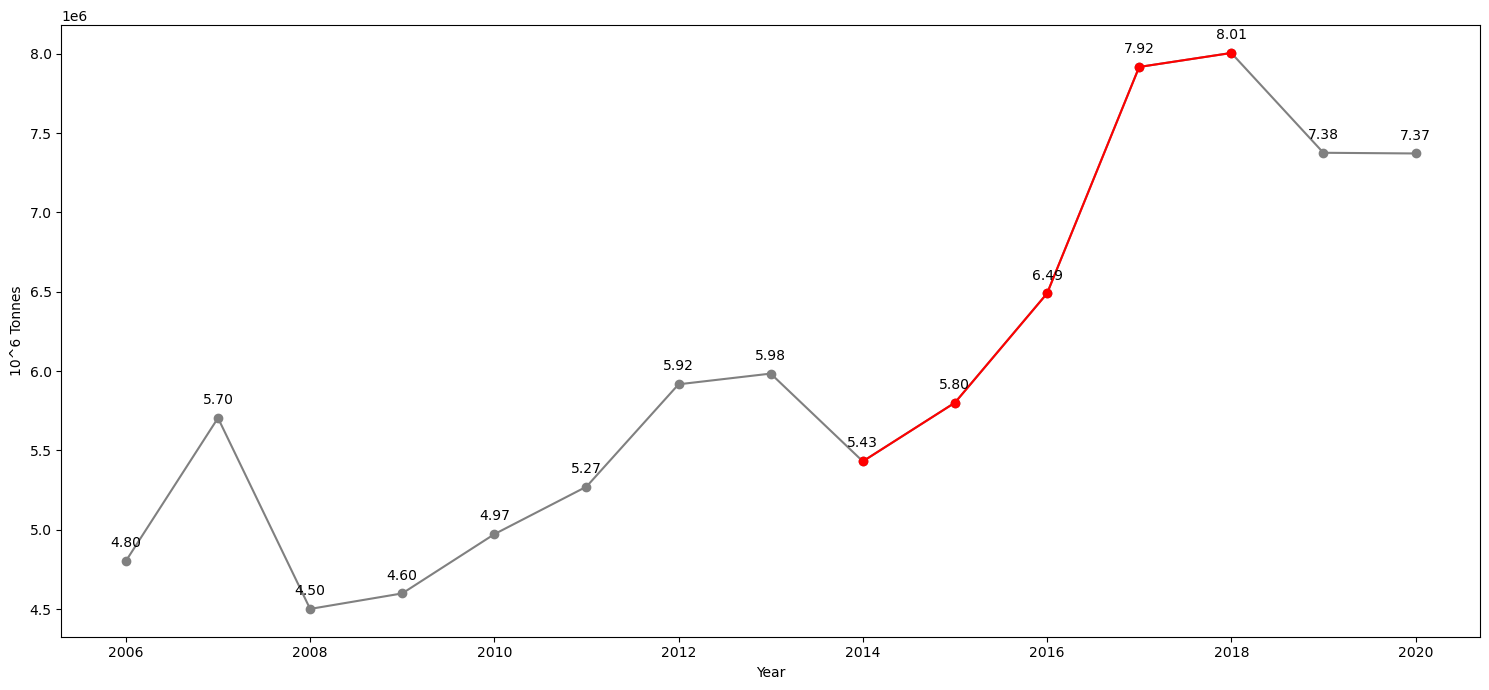

In [103]:
import matplotlib.pyplot as plt
# Group by 'Year' and 'Jurisdiction' and sum the 'Tonnes' column
grouped_df = df_1_1.groupby(['YearOnly'])['Tonnes'].sum().reset_index()

# Assuming you have a DataFrame named 'df' with columns 'Year' and 'Tonnes'

c = grouped_df['YearOnly'] >= 2014 
d = grouped_df['YearOnly'] <= 2018

comb = c & d

grouped_df2 = grouped_df[comb].copy()

# Calculate the percentage change and create a new column
grouped_df2['PercentageChange'] = ((grouped_df2['Tonnes'] - grouped_df2.loc[grouped_df2['YearOnly'] == 2014, 'Tonnes'].iloc[0]) / grouped_df2.loc[grouped_df2['YearOnly'] == 2014, 'Tonnes'].iloc[0]) * 100

print(grouped_df2)

# Create a line chart
plt.figure(figsize=(15, 7))  # Set the figure size

# Plot the data
plt.plot(grouped_df['YearOnly'], grouped_df['Tonnes'], marker='o', linestyle='-', color='grey', label='Tonnes')

# # Plot the percentage change as a bar chart
# plt.bar(grouped_df2['YearOnly'], grouped_df2['PercentageChange'], color='r', label='Percentage Change')

# Highlight the 2014-2018 period with dark red
plt.plot(grouped_df2['YearOnly'], grouped_df2['Tonnes'],marker='o', linestyle='-', color='r')

# Customize the plot
#plt.title('Overall Trend in Hazardous wastes')  # Set the title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('10^6 Tonnes')  # Label for the y-axis
#plt.grid(True)  # Add a grid
#plt.legend()  # Show the legend

# Rotate x-axis labels by 45 degrees for better readability
#plt.xticks(rotation=45)

# Display numbers at each data point
for x, y in zip(grouped_df['YearOnly'], grouped_df['Tonnes']):
    plt.annotate(f'{y/1000000:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

 # Get the current axes
ax = plt.gca()

# Remove grid lines
ax.grid(False)

# Show the chart
plt.tight_layout()  # Ensure labels and title are not cut off
plt.show()



/var/folders/_c/pg1x995n3qjg4fhpdmqdtly80000gn/T/ipykernel_13702/2541462290.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grouped_df2 = grouped_df2[c].copy()


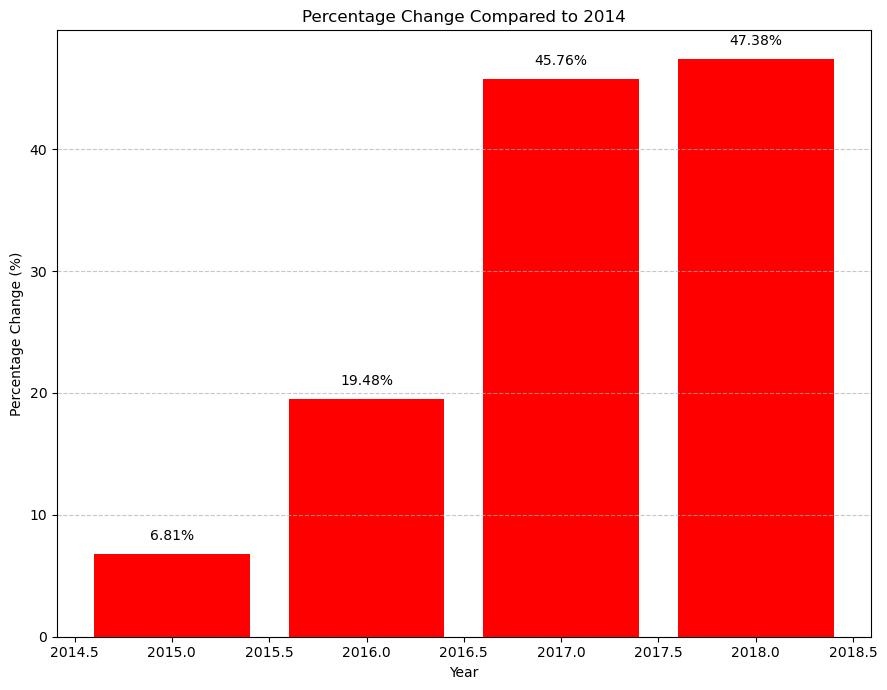

In [78]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'grouped_df2' with 'YearOnly' and 'PercentageChange' columns
c = grouped_df['YearOnly'] != 2014 

comb = c

grouped_df2 = grouped_df2[c].copy()

# Create a bar chart
plt.figure(figsize=(9, 7))  # Set the figure size

# Plot the percentage change as a bar chart
plt.bar(grouped_df2['YearOnly'], grouped_df2['PercentageChange'], color='r', label='Percentage Change')

# Customize the plot
plt.title('Percentage Change Compared to 2014')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display percentages at each data point
for x, y in zip(grouped_df2['YearOnly'], grouped_df2['PercentageChange']):
    plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the chart
plt.tight_layout()
plt.show()


The overall trend has been increasing over the years, but the interesting point to highlight is the period from 2015 - 2019. There happens to be a sudden surge. In addition, there is an decreasing trend from 2019 - 2021 by 1 tonne.

We hope to investigate the cause of this surge.

What caused this surge from 2014 - 2019?

Why is there a decrease from 2019 - 2021?

In [94]:
print(df.columns)

important_columns = ['Year', 'Jurisdiction', 'Category', 'Type', 'Classification','Stream', 'YearOnly', 'Tonnes']

df_new = df[important_columns]

print_unique_values(df_new)

Index(['Year', 'Jurisdiction', 'Category', 'Type', 'Classification',
       'Total type', 'Stream', 'Management', 'Fate', 'Tonnes',
       'Core or non-core', 'Sub-stream', 'Cat. order', 'Cat. no.',
       'Type order', 'Type no.', ' ', 'YearOnly'],
      dtype='object')
Column: Year
Unique Values: ['2020-2021' '2019-2020' '2018-2019' '2017-2018' '2016-2017' '2015-2016'
 '2014-2015' '2013-2014' '2012-2013' '2011-2012' '2010-2011' '2009-2010'
 '2008-2009' '2007-2008' '2006-2007']

Column: Jurisdiction
Unique Values: ['ACT' 'NSW' 'NT' 'Qld' 'SA' 'Tas' 'Vic' 'WA']

Column: Category
Unique Values: ['Biosolids' 'Building and demolition materials' 'Glass'
 'Hazardous wastes' 'Metals' 'Mining' 'Organics' 'Paper & cardboard'
 'Plastics' 'Textiles, leather & rubber (excl. tyres)' 'Total'
 'Unclassified materials' 'Ash']

Column: Type
Unique Values: ['Biosolids' nan 'Asphalt' 'Bricks, concrete and pavers'
 'Ceramics, tiles and pottery' 'Plasterboard & cement sheeting' 'Rubble'
 'Soil, sand and r

In [95]:
# isolate years and see how the data is structured
condition3 = df_new['Classification'] == 'Total'

# Define the fourth condition
condition4 = df_new['Stream'] == 'Total'

condition5 = df_new['Category'] == 'Hazardous wastes'

# Combine the conditions using the '&' operator for 'and' logic
combined_condition = condition3 & condition4

# Use boolean indexing to retrieve the rows that meet the combined condition
df_new2 = df_new[combined_condition].copy()

print_unique_values(df_new2)

Column: Year
Unique Values: ['2020-2021' '2019-2020' '2018-2019' '2017-2018' '2016-2017' '2015-2016'
 '2014-2015' '2013-2014' '2012-2013' '2011-2012' '2010-2011' '2009-2010'
 '2008-2009' '2007-2008' '2006-2007']

Column: Jurisdiction
Unique Values: ['ACT' 'NSW' 'NT' 'Qld' 'SA' 'Tas' 'Vic' 'WA']

Column: Category
Unique Values: ['Biosolids' 'Hazardous wastes' 'Total' 'Ash']

Column: Type
Unique Values: [nan]

Column: Classification
Unique Values: ['Total']

Column: Stream
Unique Values: ['Total']



In [96]:
# Group by 'Year' and 'Jurisdiction' and sum the 'Tonnes' column
grouped_df_new2 = df_new2.groupby(['YearOnly','Jurisdiction'])['Tonnes'].sum().reset_index()
print(grouped_df_new2)

     YearOnly Jurisdiction        Tonnes
0        2006          ACT  7.192830e+05
1        2006          NSW  2.240659e+07
2        2006           NT  5.219778e+05
3        2006          Qld  1.445720e+07
4        2006           SA  3.584798e+06
..        ...          ...           ...
115      2020          Qld  1.507204e+07
116      2020           SA  5.351368e+06
117      2020          Tas  8.961586e+05
118      2020          Vic  1.899701e+07
119      2020           WA  8.047720e+06

[120 rows x 3 columns]


     YearOnly Jurisdiction        Tonnes
64       2014          ACT  7.311723e+05
65       2014          NSW  2.290411e+07
66       2014           NT  4.618848e+05
67       2014          Qld  1.446130e+07
68       2014           SA  4.361170e+06
69       2014          Tas  9.727173e+05
70       2014          Vic  1.434018e+07
71       2014           WA  7.744456e+06
72       2015          ACT  9.267002e+05
73       2015          NSW  2.380120e+07
74       2015           NT  3.206749e+05
75       2015          Qld  1.454534e+07
76       2015           SA  4.543298e+06
77       2015          Tas  1.094851e+06
78       2015          Vic  1.513073e+07
79       2015           WA  6.831152e+06
80       2016          ACT  1.034014e+06
81       2016          NSW  2.558370e+07
82       2016           NT  3.759207e+05
83       2016          Qld  1.577971e+07
84       2016           SA  4.205164e+06
85       2016          Tas  9.381072e+05
86       2016          Vic  1.541677e+07
87       2016   

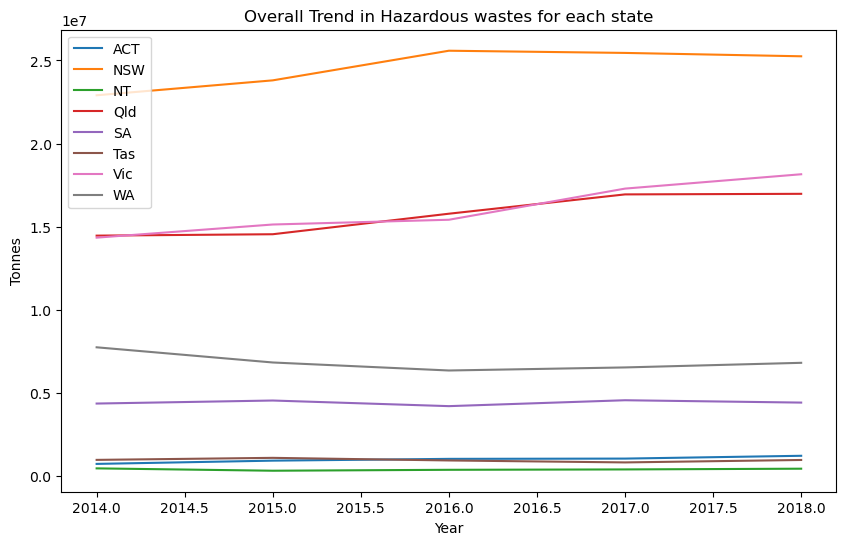

In [102]:
c = grouped_df_new2['YearOnly'] >= 2014 
d = grouped_df_new2['YearOnly'] <= 2018

comb = c & d

grouped_df = grouped_df_new2[comb].copy()

print(grouped_df)

# Create a line chart with a separate line for each jurisdiction
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each unique jurisdiction
for jurisdiction in grouped_df['Jurisdiction'].unique():
    subset = grouped_df[grouped_df['Jurisdiction'] == jurisdiction]
    ax.plot(subset['YearOnly'], subset['Tonnes'], label=jurisdiction)

# Set labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Tonnes')
ax.set_title('Overall Trend in Hazardous wastes for each state')
ax.legend()

# Show the chart
plt.grid(False)
plt.show()



We can see that NSW and Vic follows the total trend with in this period and might have contributed the sudden surge for this period from 2014 - 2019. We hope to investigate the cause of this using column Type.

The first question is without looking at the factors how does waste management look like over time?

In [ ]:
# create table with column Tonnes and Year
df_1 = df_cleaned[['Tonnes', 'Year']].copy()

print(df_1)

Sample questions to ask from the data

Q1.Is there a seasonal trend in waste generation & disposal?

Q2.What factors or features are most influential in affecting
waste generation rates?

Q3.What are the different waste management practices in
different jurisdiction?

Q4.Is there any noticeable difference in core or non-core
waste?